## Capston Project For Employee attration Data

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
##Readin Data
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\STATISTICS AND MACHINE LEARNING\Machine Learning\Capstone Project\HR_Employee_Attrition_Data.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

In [4]:
#Checking null value in data 
data.isnull().sum()  #No Null Value presented

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
## Checking for duplicate value in data 

data.duplicated().sum()      # No Duplicate value presented

0

In [6]:
# Checking Data types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

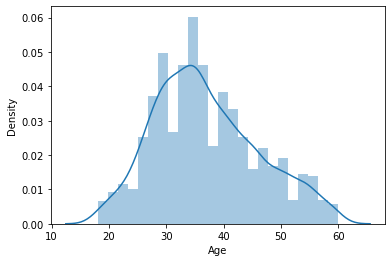

In [7]:
# Age distribution plot
sns.distplot(data['Age']) # Age in normally distributed and has range from 18 to 60

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

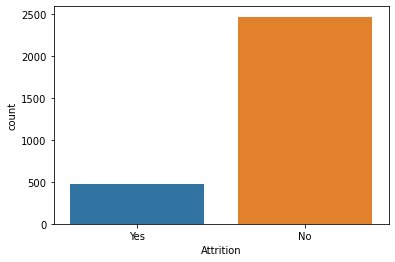

In [8]:
# Counting the age attrition by count plot
sns.countplot (data['Attrition'])  # Arround 500 are in catagory of YES and arround 2400 is in NO catagory


In [9]:
# Counting Nos Attrition catagory

print(data['Attrition'].value_counts())

No     2466
Yes     474
Name: Attrition, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

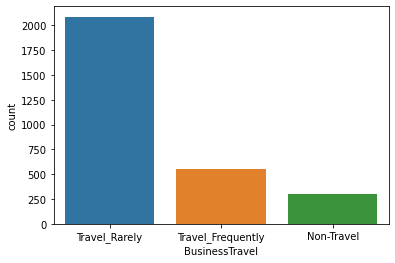

In [10]:
sns.countplot(data['BusinessTravel'])

In [11]:
print(data['BusinessTravel'].value_counts())

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


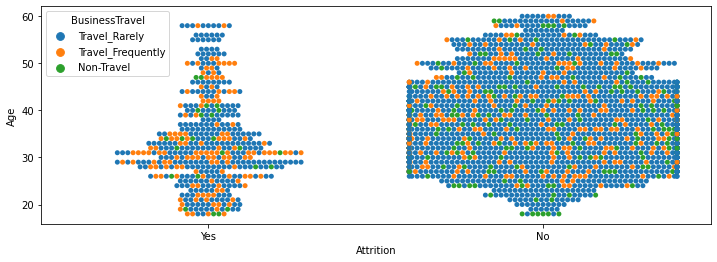

In [12]:
plt.figure(figsize=(12,4))
sns.swarmplot(y = 'Age', x = 'Attrition', data= data, hue = 'BusinessTravel')
plt.show()

# From below graph we can see see that which age of employees are travelling frequently.

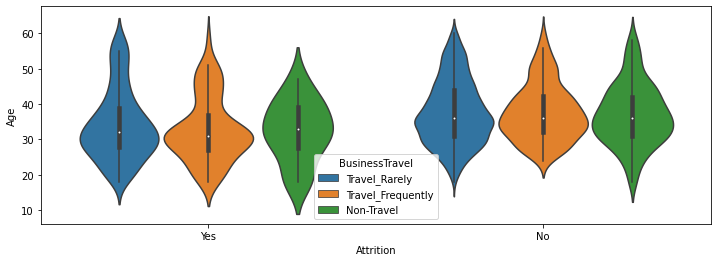

In [13]:
#For better representation, using swarm plot to see which age is travelling most(i.e: 20-35 arround)
plt.figure(figsize=(12,4))
sns.violinplot(y = 'Age', x = 'Attrition', data= data, hue = 'BusinessTravel')
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

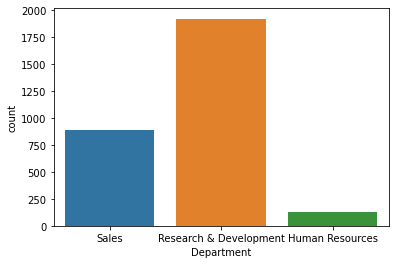

In [14]:
sns.countplot(data['Department'])
# With the help of below graph we can see strength of employees is highest in R&D dep., and then in sales and the 
# leash strength is in HR.

In [15]:
print(data['Department'].value_counts())

# cheking which department has how much no of employees. Here we can see most of the employees are in R&D depart. ,
# then in Sales and remaining in HR.

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


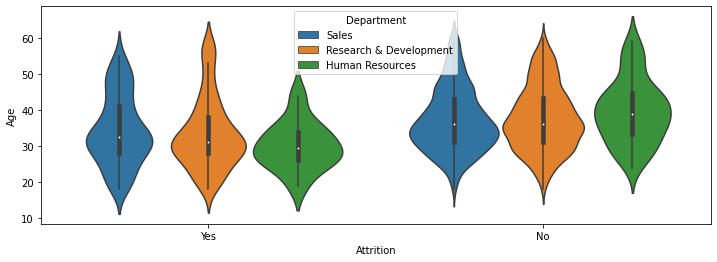

In [16]:
plt.figure(figsize=(12,4))
sns.violinplot(y = 'Age', x = 'Attrition', data= data, hue = 'Department')
plt.show()

#Motly from age 20 to 35 employees are travelling and most of them are in R&D.

In [17]:
df1  = data['Attrition']
df2 = data['Department']
df3 = data['BusinessTravel']

df = pd.concat([df1, df2, df3], axis = 1)
df

,Attrition,Department,BusinessTravel
0,Yes,Sales,Travel_Rarely
1,No,Research & Development,Travel_Frequently
2,Yes,Research & Development,Travel_Rarely
3,No,Research & Development,Travel_Frequently
4,No,Research & Development,Travel_Rarely
...,...,...,...
2935,No,Research & Development,Travel_Frequently
2936,No,Research & Development,Travel_Rarely
2937,No,Research & Development,Travel_Rarely
2938,No,Sales,Travel_Frequently


In [18]:
dept = df.groupby(by = 'Department')
df_1 = pd.DataFrame(dept.get_group('Human Resources')['BusinessTravel'].value_counts())
df_1 = df_1.reset_index()
df_1['Department'] = 'HR'
df_1


,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [19]:
dept = df.groupby(by = 'Department')
df_2 = pd.DataFrame(dept.get_group('Research & Development')['BusinessTravel'].value_counts())
df_2['Department'] = 'Research & Development'
df_2 = df_2.reset_index()
df_2

,index,BusinessTravel,Department
0,Travel_Rarely,1364,Research & Development
1,Travel_Frequently,364,Research & Development
2,Non-Travel,194,Research & Development


In [20]:
dept = df.groupby(by = 'Department')
df_3 = pd.DataFrame(dept.get_group('Sales')['BusinessTravel'].value_counts())
df_3 = df_3.reset_index()
df_3['Department'] = 'Sales'
df_3

,index,BusinessTravel,Department
0,Travel_Rarely,630,Sales
1,Travel_Frequently,168,Sales
2,Non-Travel,94,Sales


In [21]:
DF = df_2.append(df_3)
DF = DF.append(df_1)
DF

,index,BusinessTravel,Department
0,Travel_Rarely,1364,Research & Development
1,Travel_Frequently,364,Research & Development
2,Non-Travel,194,Research & Development
0,Travel_Rarely,630,Sales
1,Travel_Frequently,168,Sales
2,Non-Travel,94,Sales
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


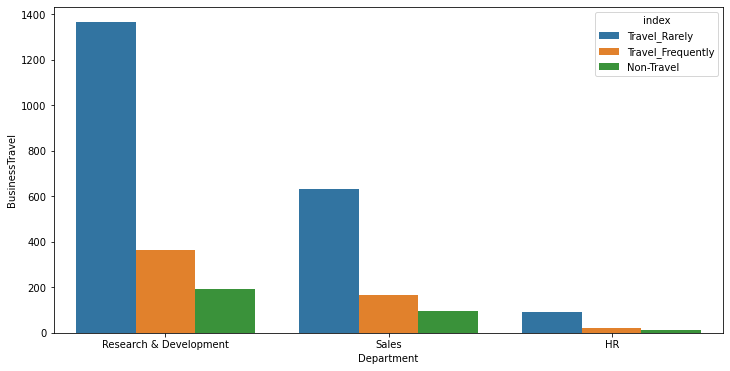

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Department', y = 'BusinessTravel', data = DF, hue = 'index' )
plt.show()
#From below plot we can see that most of the employees who are travelling is in R&D.

In [23]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

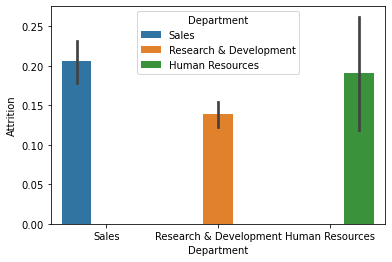

In [24]:
#Attrition for each department
sns.barplot(x='Department', y='Attrition', data= df, hue='Department')

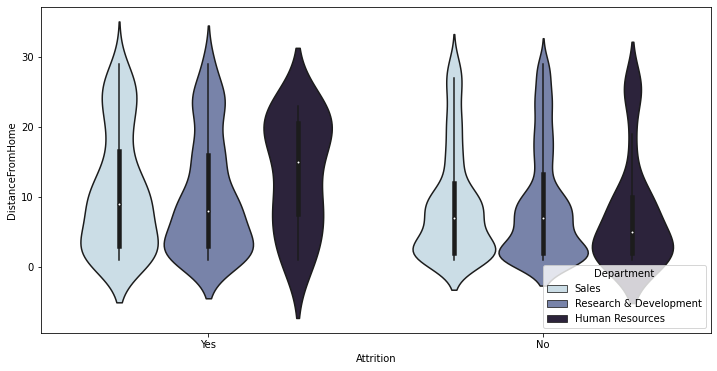

In [25]:
# Plot for DistanceFromHome v/s attrition
plt.figure(figsize=(12,6))
sns.violinplot(x = 'Attrition', y ='DistanceFromHome', data = data, hue='Department', palette='ch:s=.25,rot=-.25')
plt.show()

# From below plot we can see for ittrition of 'No' most of the employee are staying near to office.
# For 'Yes' employees are having a good amount for higher distance.

In [26]:
edu = data['Education']
attr = data['Attrition']

edu_attr = pd.concat([edu,attr], axis=1)

Education_Attrition = edu_attr.groupby(['Education', 'Attrition'])
Education_Attrition.groups.keys()


dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [27]:
edu = Education_Attrition.get_group((1, 'Yes'))['Attrition'].count()
edu_attr_Yes = pd.DataFrame(columns=['Education', 'Attrition', 'edu'])
edu_attr_Yes.loc[len(edu_attr_Yes)] = [1,'Yes',edu]
edu_attr_Yes

,Education,Attrition,edu
0,1,Yes,62


In [28]:
edu = Education_Attrition.get_group((2, 'Yes'))['Attrition'].count()
edu_attr_Yes.loc[len(edu_attr_Yes)] = [2,'Yes',edu]
edu_attr_Yes


,Education,Attrition,edu
0,1,Yes,62
1,2,Yes,88


In [29]:
edu = Education_Attrition.get_group((3, 'Yes'))['Attrition'].count()
edu_attr_Yes.loc[len(edu_attr_Yes)] = [3,'Yes',edu]
edu_attr_Yes

,Education,Attrition,edu
0,1,Yes,62
1,2,Yes,88
2,3,Yes,198


In [30]:
edu = Education_Attrition.get_group((4, 'Yes'))['Attrition'].count()
edu_attr_Yes.loc[len(edu_attr_Yes)] = [4,'Yes',edu]
edu_attr_Yes

,Education,Attrition,edu
0,1,Yes,62
1,2,Yes,88
2,3,Yes,198
3,4,Yes,116


In [31]:
edu = Education_Attrition.get_group((5, 'Yes'))['Attrition'].count()
edu_attr_Yes.loc[len(edu_attr_Yes)] = [5,'Yes',edu]
edu_attr_Yes

,Education,Attrition,edu
0,1,Yes,62
1,2,Yes,88
2,3,Yes,198
3,4,Yes,116
4,5,Yes,10


<AxesSubplot:xlabel='Education', ylabel='edu'>

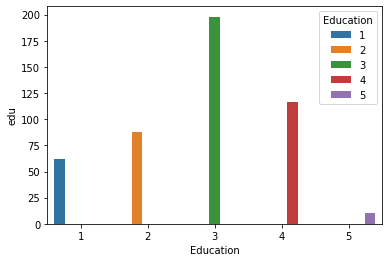

In [32]:
# plotting a graph to see which education level employee having how much attrition.
sns.barplot(x='Education', y='edu', data=edu_attr_Yes, hue='Education')

# From below graph we can see the employee of education level 1 is having a gihest attrition rate as yes.

In [33]:
edu_ = Education_Attrition.get_group((1, 'No'))['Attrition'].count()
edu_attr_No = pd.DataFrame(columns=['Education', 'Attrition', 'edu_'])
edu_attr_No.loc[len(edu_attr_No)] = [1,'No',edu_]
edu_attr_No

,Education,Attrition,edu_
0,1,No,278


In [34]:
edu_ = Education_Attrition.get_group((2, 'No'))['Attrition'].count()
edu_attr_No.loc[len(edu_attr_No)] = [2,'No',edu_]
edu_attr_No

,Education,Attrition,edu_
0,1,No,278
1,2,No,476


In [35]:
edu_ = Education_Attrition.get_group((3, 'No'))['Attrition'].count()
edu_attr_No.loc[len(edu_attr_No)] = [3,'No',edu_]
edu_attr_No

,Education,Attrition,edu_
0,1,No,278
1,2,No,476
2,3,No,946


In [36]:
edu_ = Education_Attrition.get_group((4, 'No'))['Attrition'].count()
edu_attr_No.loc[len(edu_attr_No)] = [4,'No',edu_]
edu_attr_No

,Education,Attrition,edu_
0,1,No,278
1,2,No,476
2,3,No,946
3,4,No,680


In [37]:
edu_ = Education_Attrition.get_group((5, 'No'))['Attrition'].count()
edu_attr_No.loc[len(edu_attr_No)] = [5,'No',edu_]
edu_attr_No

,Education,Attrition,edu_
0,1,No,278
1,2,No,476
2,3,No,946
3,4,No,680
4,5,No,86


<AxesSubplot:xlabel='Education', ylabel='edu_'>

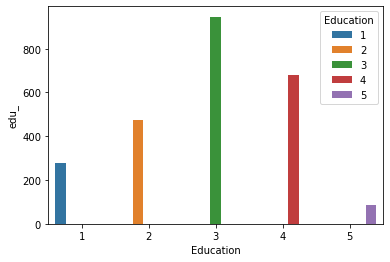

In [38]:
# plotting graph to see the reation b/w education level and attrition No
sns.barplot(x='Education', y='edu_', data=edu_attr_No, hue='Education')

# From below graph we can see that 3rd level of employee is having high rate of No in Attrition.

In [39]:
# As we have already done the plotting for Deartment and Education field, so neglecting the plot for Education stream of employee.
# As the count of employee is having one value only that's why it's not of any use.
# Employee id will not affect attrition rate, so neglecting this column also.

In [40]:
# Grouping by value by EnvironmentSatisfaction and Attrition to find the total no of employee having satisfaction rate and 
# Attrition as Yes and No.
EnvSatisfationAttrition = data.groupby(['EnvironmentSatisfaction', 'Attrition'])
EnvSatisfationAttrition.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [41]:
# Counting the of employee having satisaftion as 1 and Attrition as yes
TotalNoAsYes = EnvSatisfationAttrition.get_group((1,'Yes'))['EnvironmentSatisfaction'].count()

# Creating the datafram for future use when we'll plot a graph
AttritionRateForEnvSat = pd.DataFrame(columns=['EnvironmentSatisfaction', 'Attrition', 'TotalNoAsYes'])

# Passing the value to datafram 
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [1, 'Yes', TotalNoAsYes]
AttritionRateForEnvSat

TotalNoAsYes = EnvSatisfationAttrition.get_group((2,'Yes'))['EnvironmentSatisfaction'].count()
# Counting the of employee having satisaftion as 2 and Attrition as yes
TotalNo = EnvSatisfationAttrition.get_group((2,'Yes'))['EnvironmentSatisfaction'].count()
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [2, 'Yes', TotalNoAsYes]

TotalNoAsYes = EnvSatisfationAttrition.get_group((3,'Yes'))['EnvironmentSatisfaction'].count()
# Counting the of employee having satisaftion as 3 and Attrition as yes
TotalNo = EnvSatisfationAttrition.get_group((3,'Yes'))['EnvironmentSatisfaction'].count()
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [3, 'Yes', TotalNoAsYes]

TotalNoAsYes = EnvSatisfationAttrition.get_group((4,'Yes'))['EnvironmentSatisfaction'].count()
# Counting the of employee having satisaftion as 3 and Attrition as yes
TotalNo = EnvSatisfationAttrition.get_group((4,'Yes'))['EnvironmentSatisfaction'].count()
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [4, 'Yes', TotalNoAsYes]

AttritionRateForEnvSat

,EnvironmentSatisfaction,Attrition,TotalNoAsYes
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='TotalNoAsYes'>

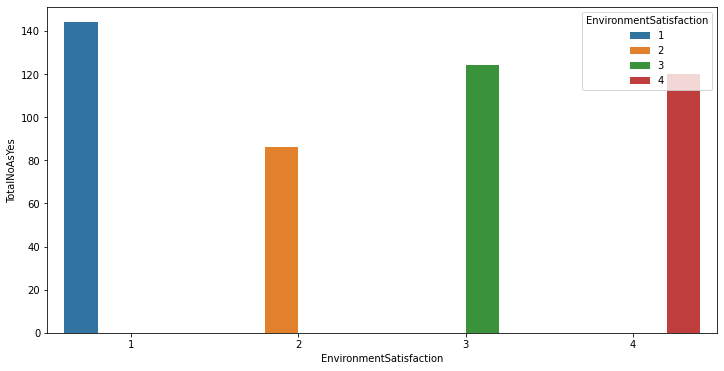

In [42]:
# Creating plot for EnvironmentSatisfaction and Attrition as Yes
plt.figure(figsize=(12,6))
sns.barplot(x='EnvironmentSatisfaction', y= 'TotalNoAsYes', data=AttritionRateForEnvSat, hue='EnvironmentSatisfaction')

# Form below graph and above dataframe we can say that the employee of 3rd and 4th level satisfaction level have same counts
# and the attrition as Yes. 
# And the Satisfaction level 1 employee are the most in no for attrition as Yes

In [43]:
# Counting the of employee having satisaftion as 1 and Attrition as No
TotalNumberAsNo = EnvSatisfationAttrition.get_group((1,'No'))['EnvironmentSatisfaction'].count()

# Creating the datafram for future use when we'll plot a graph
AttritionRateForEnvSat = pd.DataFrame(columns=['EnvironmentSatisfaction', 'Attrition', 'TotalNumberAsNo'])

# Passing the value to datafram 
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [1, 'No', TotalNumberAsNo]
AttritionRateForEnvSat

TotalNumberAsNo = EnvSatisfationAttrition.get_group((2,'No'))['EnvironmentSatisfaction'].count()
# Counting the of employee having satisaftion as 2 and Attrition as no
TotalNo = EnvSatisfationAttrition.get_group((2,'No'))['EnvironmentSatisfaction'].count()
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [2, 'No', TotalNumberAsNo]

TotalNumberAsNo = EnvSatisfationAttrition.get_group((3,'No'))['EnvironmentSatisfaction'].count()
# Counting the of employee having satisaftion as 3 and Attrition as no
TotalNo = EnvSatisfationAttrition.get_group((3,'No'))['EnvironmentSatisfaction'].count()
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [3, 'No', TotalNumberAsNo]

TotalNumberAsNo = EnvSatisfationAttrition.get_group((4,'No'))['EnvironmentSatisfaction'].count()
# Counting the of employee having satisaftion as 3 and Attrition as no
TotalNo = EnvSatisfationAttrition.get_group((4,'No'))['EnvironmentSatisfaction'].count()
AttritionRateForEnvSat.loc[len(AttritionRateForEnvSat)] = [4, 'No', TotalNumberAsNo]

AttritionRateForEnvSat

,EnvironmentSatisfaction,Attrition,TotalNumberAsNo
0,1,No,424
1,2,No,488
2,3,No,782
3,4,No,772


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='TotalNumberAsNo'>

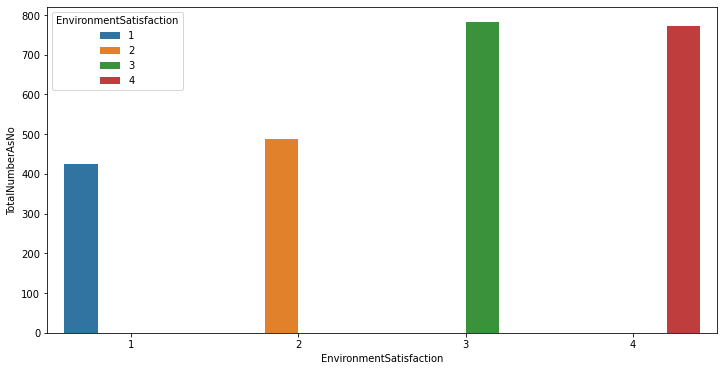

In [44]:
# Creating plot for EnvironmentSatisfaction and Attrition as No
plt.figure(figsize=(12,6))
sns.barplot(x='EnvironmentSatisfaction', y='TotalNumberAsNo', data=AttritionRateForEnvSat, hue= 'EnvironmentSatisfaction')

# Form below graph and above dataframe we can say that the employee of 3rd and 4th level satisfaction level have same counts
# and the attrition as Yes.

In [45]:
# Grouping by on the basis of Gender column (i.e. Male and female)
GenderAttrition = data.groupby(by='Gender')

# Counting the no of Male employee for attrion Yes and No
GenderAttritionMale = pd.DataFrame(GenderAttrition.get_group('Male')['Attrition'].value_counts())
GenderAttritionMale = GenderAttritionMale.reset_index()
GenderAttritionMale['Gender'] = 'Male'
GenderAttritionMale

,index,Attrition,Gender
0,No,1464,Male
1,Yes,300,Male


In [46]:
# Counting the no of Femlae employee for attrion Yes and No
GenderAttritionFemale = pd.DataFrame(GenderAttrition.get_group('Female')['Attrition'].value_counts())
GenderAttritionFemale = GenderAttritionFemale.reset_index()
GenderAttritionFemale['Gender'] = 'Female'
GenderAttritionFemale

,index,Attrition,Gender
0,No,1002,Female
1,Yes,174,Female


In [47]:
# Adding both Data value for Male and female with append method
Gender_Attrition = GenderAttritionMale.append(GenderAttritionFemale)
Gender_Attrition

,index,Attrition,Gender
0,No,1464,Male
1,Yes,300,Male
0,No,1002,Female
1,Yes,174,Female


<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

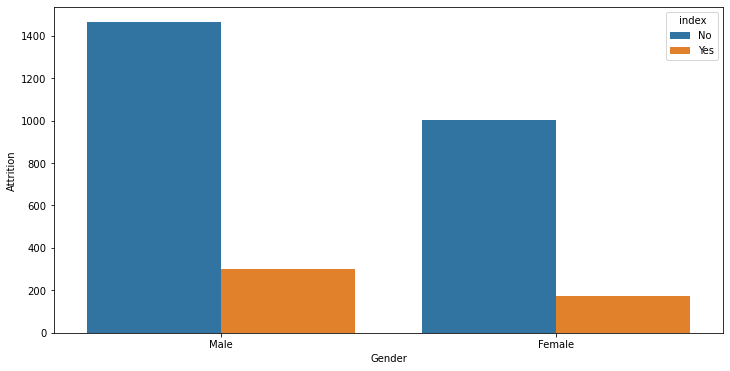

In [48]:
# Generating a barplot for Gneder V/s attrition
plt.figure(figsize=(12,6))
sns.barplot(x='Gender', y='Attrition', data=Gender_Attrition, hue='index')

# Belwo graph shown that the Male employees have a higher rate in both the attrition Yes and No.

In [49]:
# Grouping by on the basis of Gender column (i.e. Male and female)
GenderEnvironmentSatisfaction = data.groupby(by='Gender')

# Counting the no of Male employee for GenderEnvironmentSatisfaction 
GenderEnvSatisfactionMale = pd.DataFrame(GenderEnvironmentSatisfaction.get_group('Male')['EnvironmentSatisfaction'].value_counts())
GenderEnvSatisfactionMale = GenderEnvSatisfactionMale.reset_index()
GenderEnvSatisfactionMale['Gender'] = 'Male'
GenderEnvSatisfactionMale

,index,EnvironmentSatisfaction,Gender
0,4,544,Male
1,3,528,Male
2,2,350,Male
3,1,342,Male


<AxesSubplot:xlabel='Gender', ylabel='EnvironmentSatisfaction'>

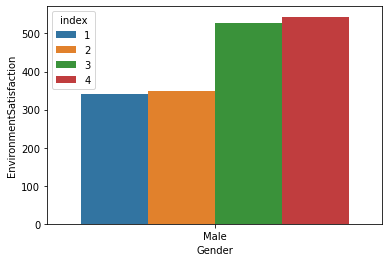

In [50]:
#plotting graph for Male employee satisfaction. It shown 60% arrounf mole employee are satisfied till 3-4 level.
sns.barplot(x='Gender', y='EnvironmentSatisfaction', data=GenderEnvSatisfactionMale, hue='index')

In [51]:
# Grouping by on the basis of Gender column (i.e. Male and female)
GenderEnvironmentSatisfaction = data.groupby(by='Gender')

# Counting the no of Female employee for GenderEnvironmentSatisfaction 
GenderEnvSatisfactionfemale = pd.DataFrame(GenderEnvironmentSatisfaction.get_group('Female')['EnvironmentSatisfaction'].value_counts())
GenderEnvSatisfactionfemale = GenderEnvSatisfactionfemale.reset_index()
GenderEnvSatisfactionfemale['Gender'] = 'Female'
GenderEnvSatisfactionfemale

,index,EnvironmentSatisfaction,Gender
0,3,378,Female
1,4,348,Female
2,1,226,Female
3,2,224,Female


<AxesSubplot:xlabel='Gender', ylabel='EnvironmentSatisfaction'>

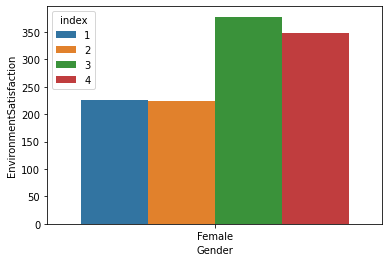

In [52]:
#plotting graph for Female employee satisfaction. Max no of emploee in female catagory lies in 3 level satisfaction
sns.barplot(x='Gender', y='EnvironmentSatisfaction', data=GenderEnvSatisfactionfemale, hue='index')

<AxesSubplot:xlabel='Gender', ylabel='EnvironmentSatisfaction'>

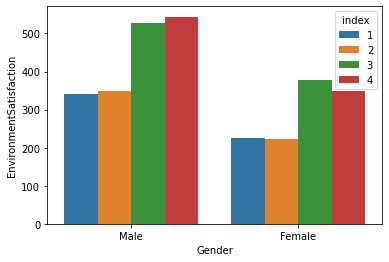

In [53]:
Gender_EnvSatisfaction = GenderEnvSatisfactionMale.append(GenderEnvSatisfactionfemale)

# Ploting a graph to see the variation in Male and Female employee Environement satisfation rate.
sns.barplot(x='Gender', y='EnvironmentSatisfaction', data= Gender_EnvSatisfaction, hue='index')

# Graph shown that male employee have higher satisfaction rate then female employee. 

In [54]:
#Calculating the no of employee on for attrition yes on the basis of level
JobLevel = data.groupby(by='Attrition')

JobLevel_AttritionYes = pd.DataFrame(JobLevel.get_group('Yes')['JobLevel'].value_counts())
JobLevel_AttritionYes = JobLevel_AttritionYes.reset_index()
JobLevel_AttritionYes['Attrition']= 'Yes'
JobLevel_AttritionYes.columns=['JobLevel', 'Count','Attrition']
JobLevel_AttritionYes

,JobLevel,Count,Attrition
0,1,286,Yes
1,2,104,Yes
2,3,64,Yes
3,5,10,Yes
4,4,10,Yes


Text(0.5, 1.0, "JobLevel/AttritionCount('Yes')")

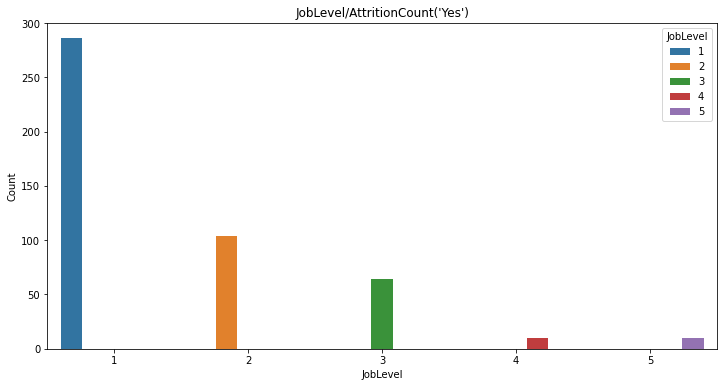

In [55]:
# plotting a graph for JobLevel v/s attrition('Yes')
plt.figure(figsize=(12,6))
sns.barplot(x='JobLevel', y='Count', data=JobLevel_AttritionYes, hue='JobLevel')
plt.title("JobLevel/AttritionCount('Yes')")
# Graph shows that the level one employee has highest no for attrition Yes.

In [56]:
JobLevel = data.groupby(by='Attrition')

JobLevel_AttritionNo = pd.DataFrame(JobLevel.get_group('No')['JobLevel'].value_counts())
JobLevel_AttritionNo = JobLevel_AttritionNo.reset_index()
JobLevel_AttritionNo['Attrition']= 'No'
JobLevel_AttritionNo.columns=['JobLevel', 'Count','Attrition']
JobLevel_AttritionNo

,JobLevel,Count,Attrition
0,2,964,No
1,1,800,No
2,3,372,No
3,4,202,No
4,5,128,No


Text(0.5, 1.0, "JobLevel/AttritionCount('No')")

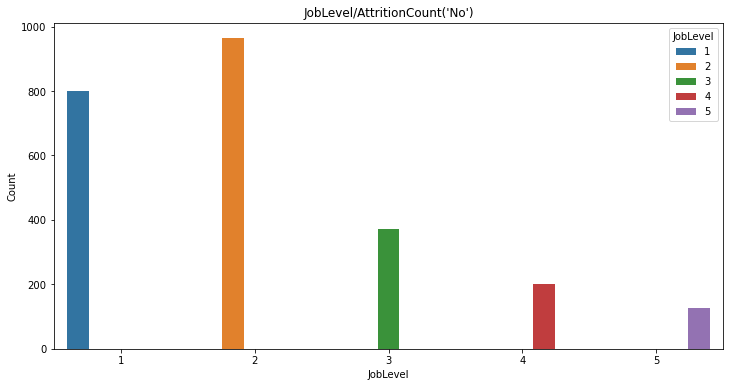

In [57]:
# plotting a graph for JobLevel v/s attrition('No')

plt.figure(figsize=(12,6))
sns.barplot(x='JobLevel', y='Count', data=JobLevel_AttritionNo, hue='JobLevel')
plt.title("JobLevel/AttritionCount('No')")

# Graph is representing that level 2 has highest no of attrition as No.

In [58]:
# Graph for Job Satisfaction V/S Attrition
Jobsatisfaction = data.groupby(by='Attrition')

JobLevel_Satisfaction = pd.DataFrame(Jobsatisfaction.get_group('Yes')['JobSatisfaction'].value_counts())
JobLevel_Satisfaction = JobLevel_Satisfaction.reset_index()
JobLevel_Satisfaction['Attrition']= 'Yes'
JobLevel_Satisfaction.columns=['JobSatisfaction', 'Count','Attrition']
JobLevel_Satisfaction

,JobSatisfaction,Count,Attrition
0,3,146,Yes
1,1,132,Yes
2,4,104,Yes
3,2,92,Yes


Text(0.5, 1.0, "JobSatisfaction v/s Attrition('Yes')")

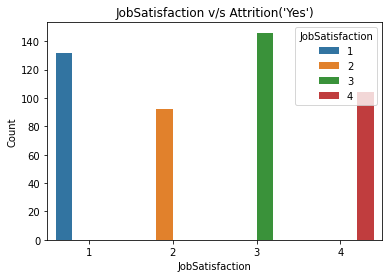

In [59]:
# Below graph shows elvel 3 has high attrition rate as yes followed by level 1.
sns.barplot(x='JobSatisfaction', y='Count', data=JobLevel_Satisfaction, hue='JobSatisfaction')
plt.title("JobSatisfaction v/s Attrition('Yes')")

In [60]:
# Plot for monthly income v/S Attrition

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

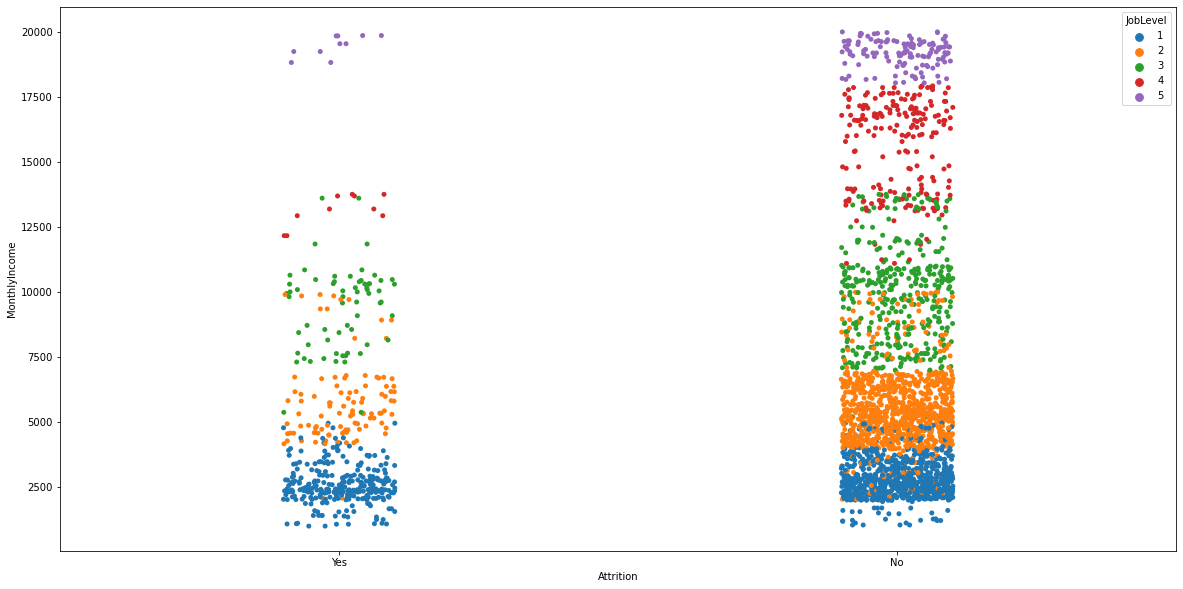

In [61]:
plt.figure(figsize=(20,10))
sns.stripplot(x='Attrition', y='MonthlyIncome', data= data, hue='JobLevel')
plt.tight_layout
# From below graph we can say that most of the employees are lying b/w 2000-7500 range of salary and they are in job level 1 and 2
# Also from below plot we can say that the employee of level 4 and 5 are figh in attrition rate as No. where as level 1, 2 & 3 are
# good in no then 4 and 5 level

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

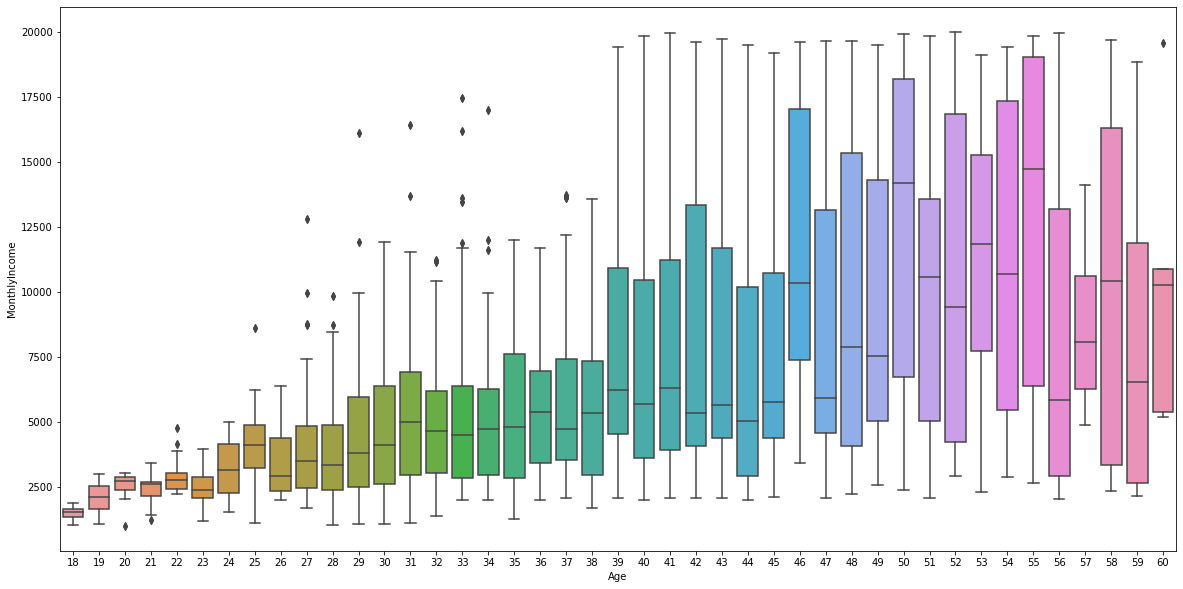

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Age', y='MonthlyIncome', data= data)
plt.tight_layout

# From below graph we can

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

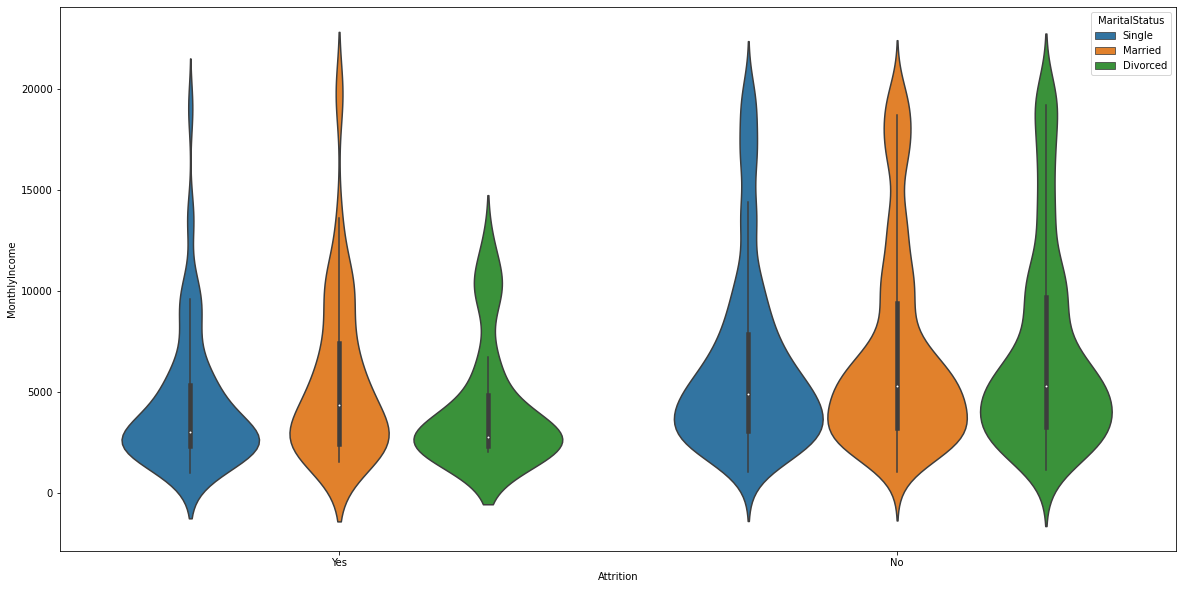

In [63]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Attrition', y='MonthlyIncome', data= data, hue='MaritalStatus')
plt.tight_layout
# Attrition(Yes) is high for employees who are single.

<AxesSubplot:xlabel='JobLevel', ylabel='PercentSalaryHike'>

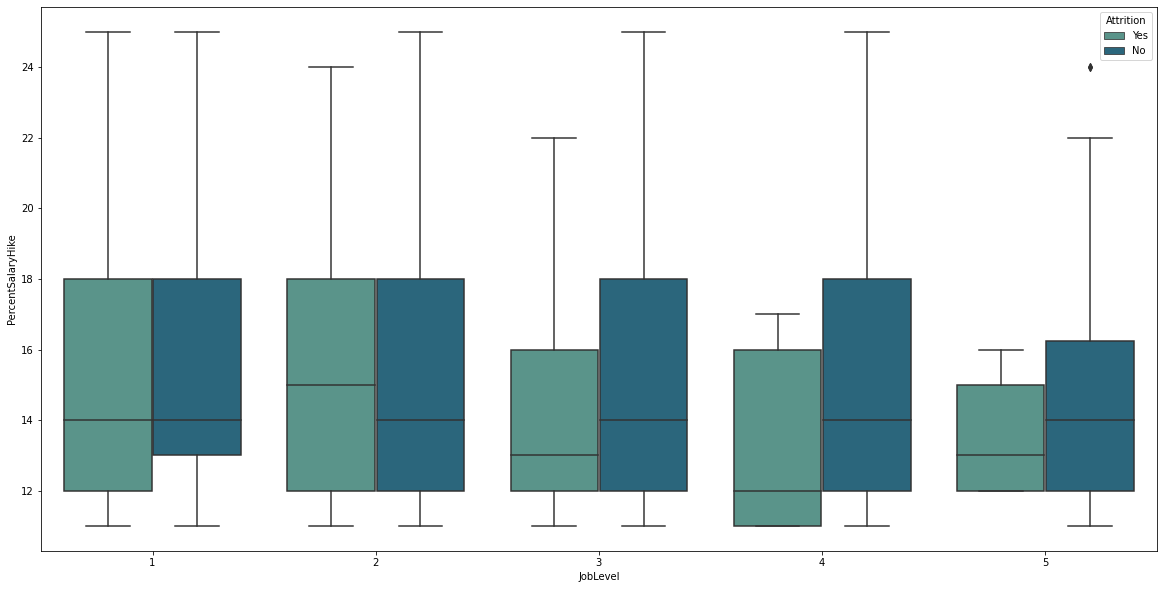

In [64]:
# Plot for Salary hike v/s JobLevel

plt.figure(figsize=(20,10))
sns.boxplot(x='JobLevel', y='PercentSalaryHike', data=data, hue='Attrition', palette='crest')

#from below graph we can see the avg. hike of level 1,2,3,4 is nearby but the hike is less for level 5 as compare to other level.

<AxesSubplot:xlabel='JobRole', ylabel='PercentSalaryHike'>

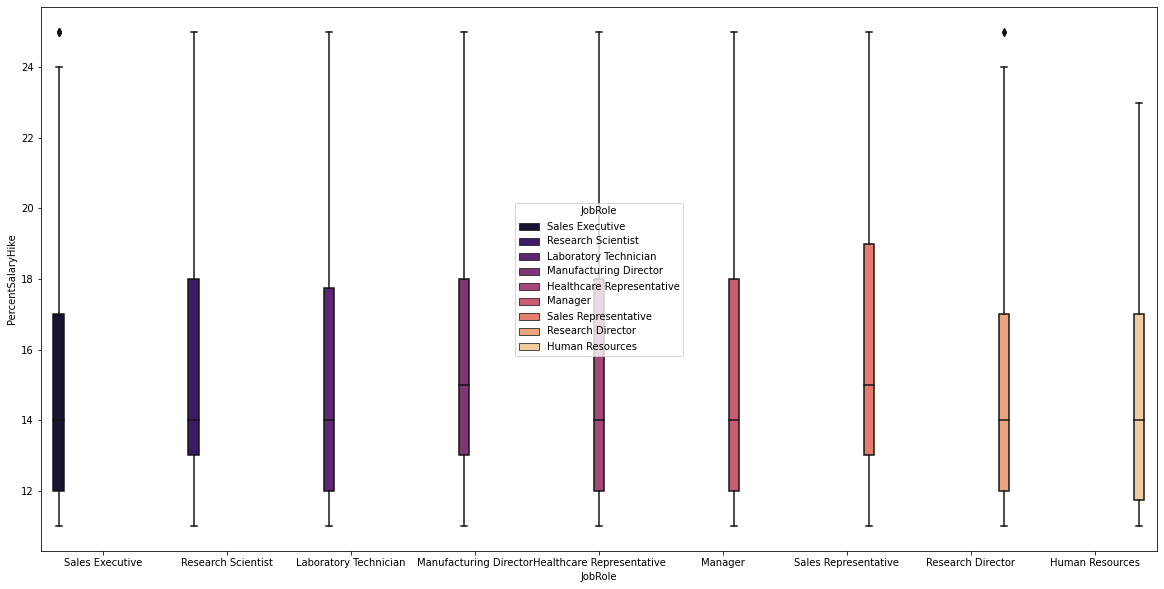

In [65]:
# Plot for Salary hike v/s JobeRole

plt.figure(figsize=(20,10))
sns.boxplot(x='JobRole', y='PercentSalaryHike', data=data, hue='JobRole', palette='magma')

# below graph is showing the %hike for each role.

<AxesSubplot:xlabel='Gender', ylabel='PercentSalaryHike'>

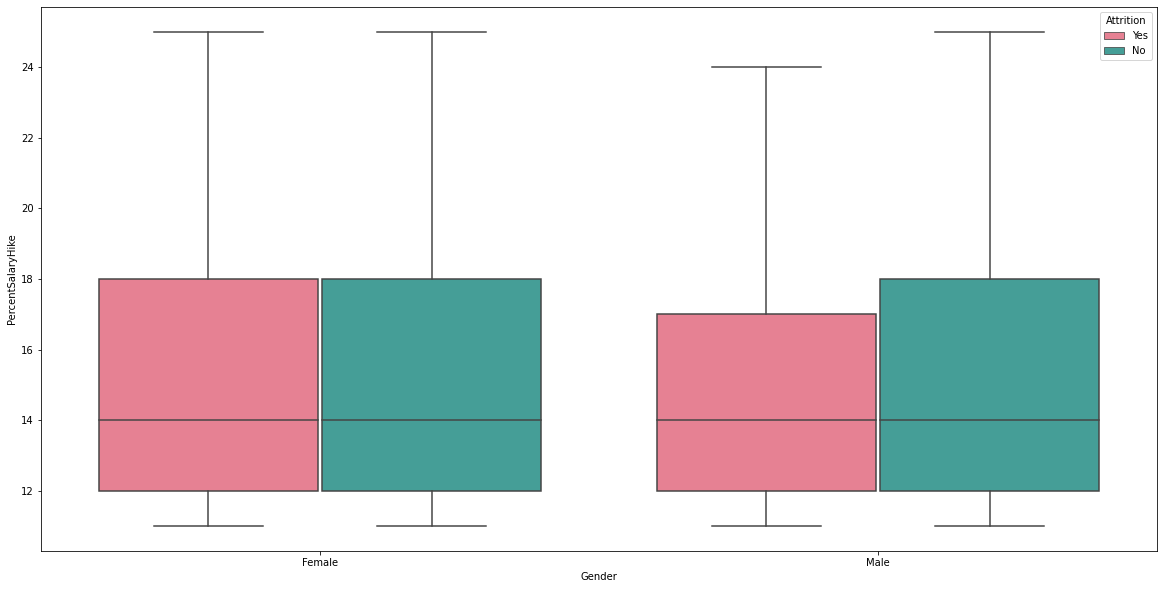

In [66]:
# Plot for salary hike v/s Gender

plt.figure(figsize=(20,10))
sns.boxplot(x='Gender', y='PercentSalaryHike', data=data, hue='Attrition', palette='husl')

# salary hike is almost same for both the gender.

<AxesSubplot:xlabel='Department', ylabel='PercentSalaryHike'>

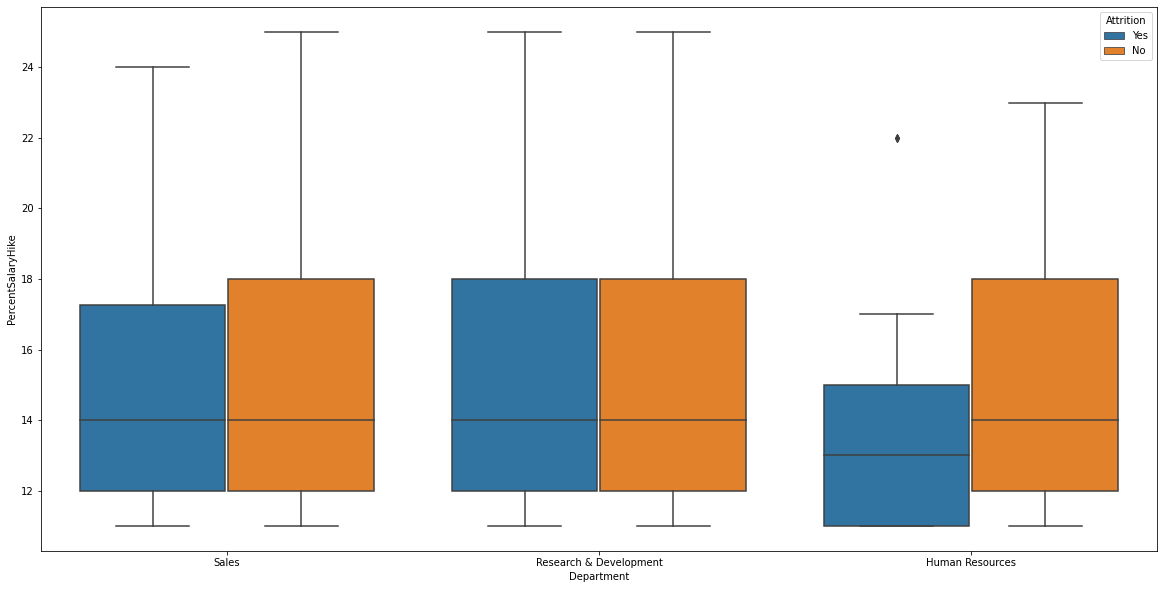

In [67]:
# Plot for salary hike v/s Department

plt.figure(figsize=(20,10))
sns.boxplot(x='Department', y='PercentSalaryHike', data=data, hue='Attrition')

# salary hike is less for Hr, where as there is less variation for sales and R&D.

<AxesSubplot:xlabel='Education', ylabel='PercentSalaryHike'>

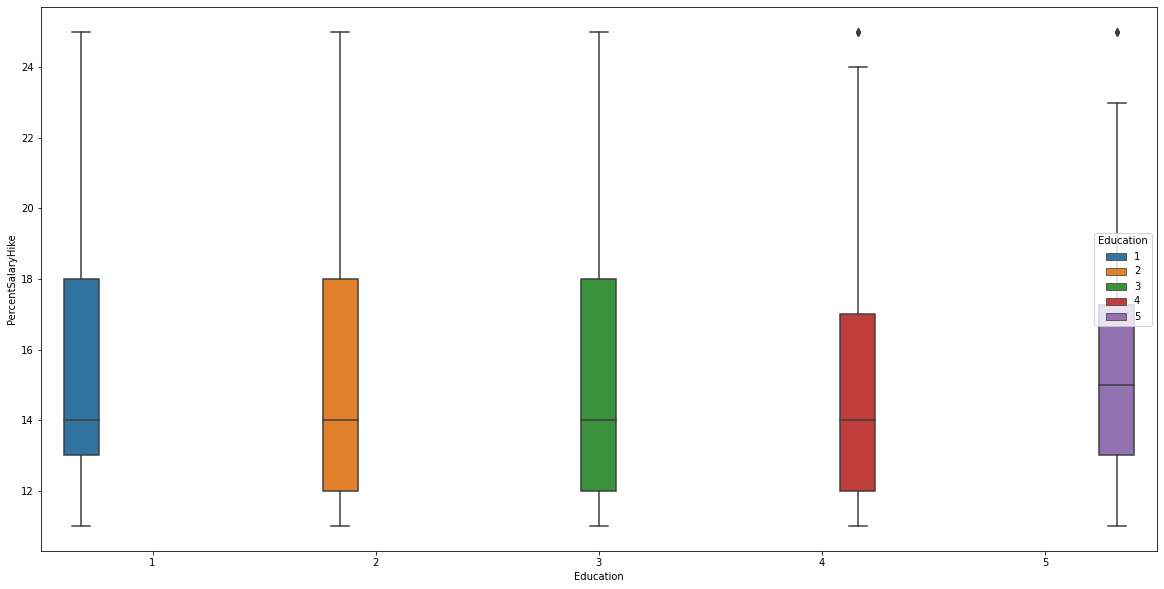

In [68]:
# Plot for salary hike v/s Education

plt.figure(figsize=(20,10))
sns.boxplot(x='Education', y='PercentSalaryHike', data=data, hue='Education')


<AxesSubplot:xlabel='JobSatisfaction', ylabel='PercentSalaryHike'>

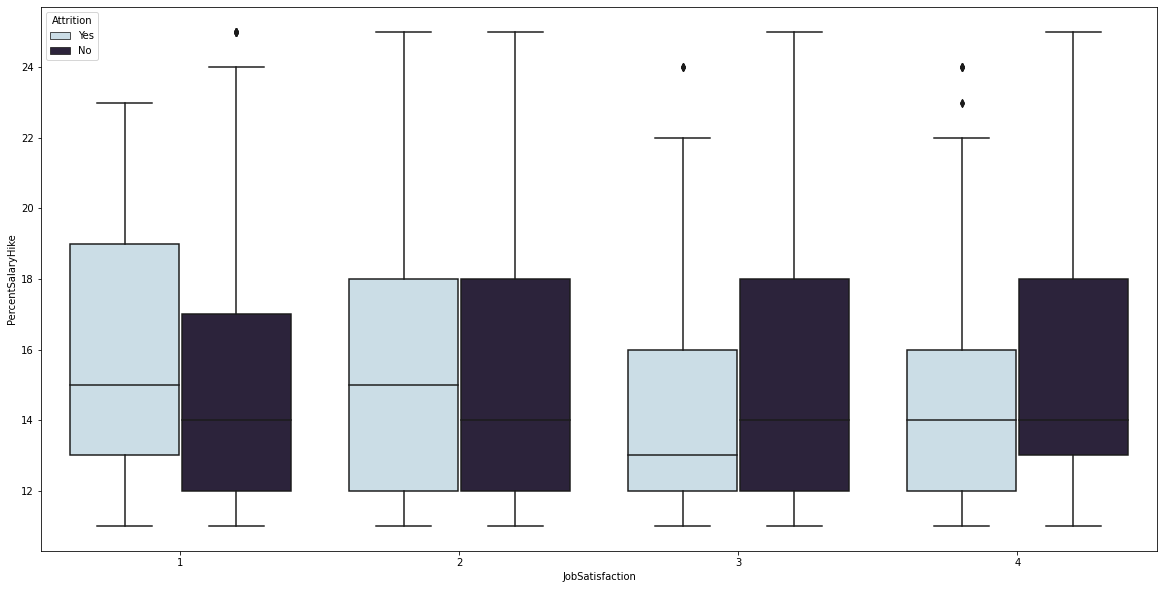

In [69]:
# Plot for salary hike v/s JobSatisfaction

plt.figure(figsize=(20,10))
sns.boxplot(x='JobSatisfaction', y='PercentSalaryHike', data=data, hue='Attrition', palette='ch:s=.25,rot=-.25')


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='PercentSalaryHike'>

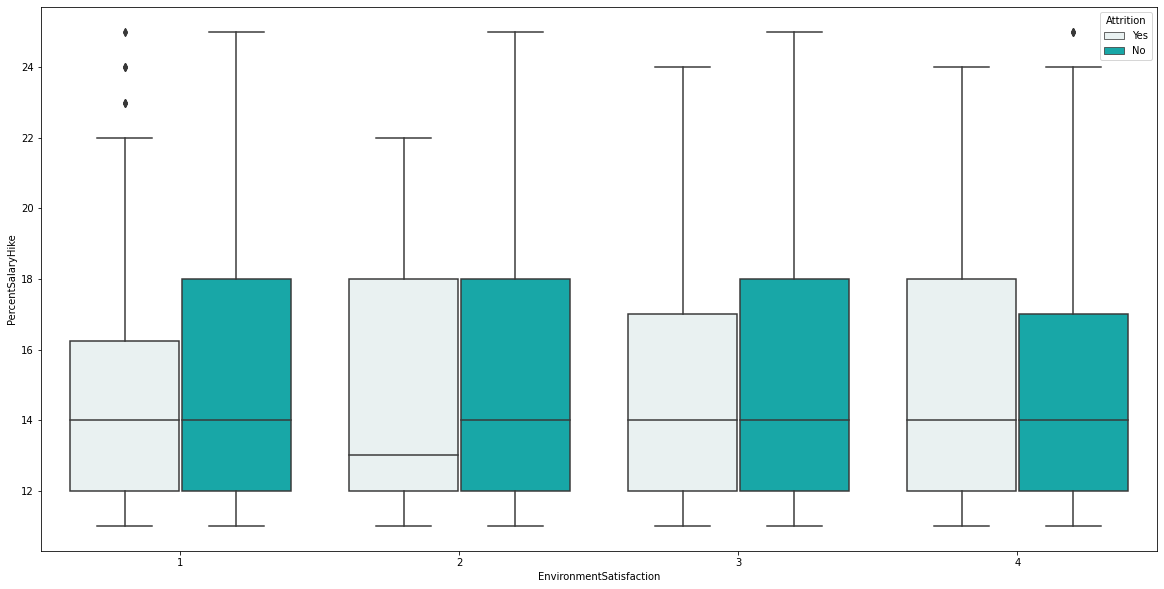

In [70]:
# Plot for salary hike v/s EnvironmentSatisfaction

plt.figure(figsize=(20,10))
sns.boxplot(x='EnvironmentSatisfaction', y='PercentSalaryHike', data=data, hue='Attrition', color='c')


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='PercentSalaryHike'>

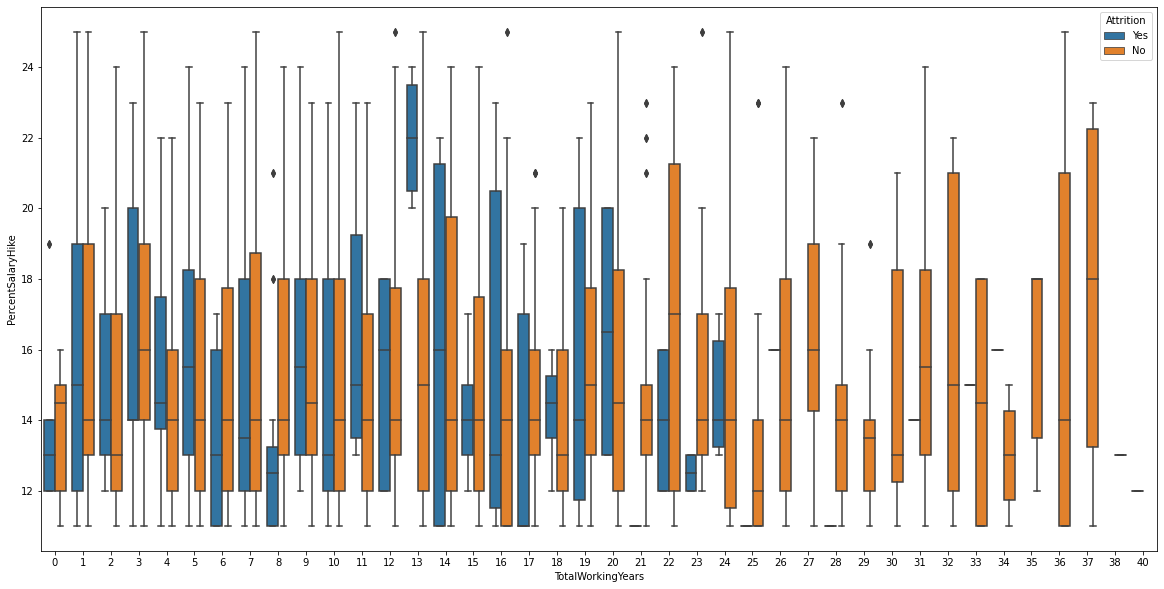

In [71]:
# Plot for salary hike v/s working years in company

plt.figure(figsize=(20,10))
sns.boxplot(x='TotalWorkingYears', y='PercentSalaryHike', data=data, hue='Attrition')

# From below graph we can see employee having experience of more then 25 years have No attrition rate.

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

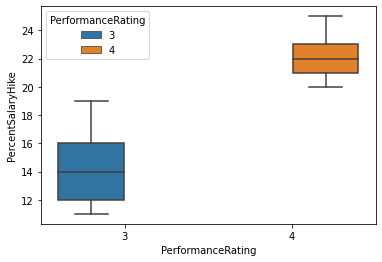

In [72]:
# Plot for salary hike v/s Performance rating

sns.boxplot(x='PerformanceRating', y='PercentSalaryHike', data=data, hue='PerformanceRating')

#below graph is showing that the hike perecentage is varying b/w 20~25 for rating of 4 and for rating 3 employee the 
# percentage hiek is varying b/w 10~19

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='PercentSalaryHike'>

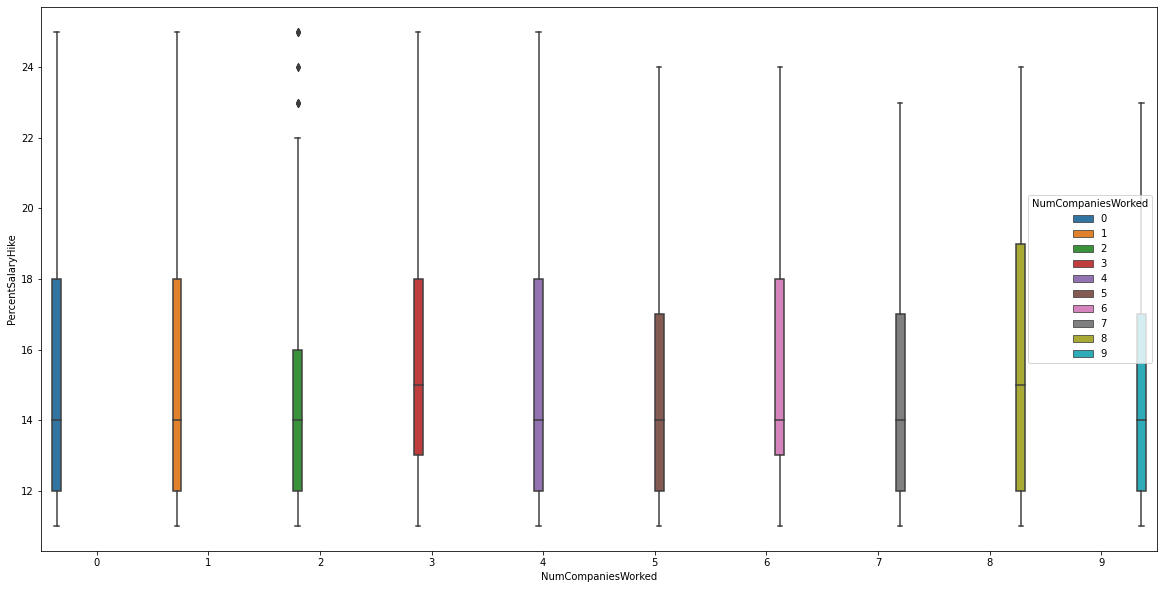

In [73]:
# Plot for Percentage hike v/s No of company worked
plt.figure(figsize=(20,10))
sns.boxplot(x='NumCompaniesWorked', y='PercentSalaryHike', data=data, hue='NumCompaniesWorked')


In [74]:
#plot for Number of company worked v/s attrition
ExperienceofComp = data.groupby(by='Attrition')

Experience = pd.DataFrame(ExperienceofComp.get_group('Yes')['NumCompaniesWorked'].value_counts())
Experience = Experience.reset_index()
Experience['Attrition']= 'Yes'
Experience.columns=['NumCompaniesWorked', 'Count','Attrition']
Experience

,NumCompaniesWorked,Count,Attrition
0,1,196,Yes
1,0,46,Yes
2,7,34,Yes
3,4,34,Yes
4,6,32,Yes
5,5,32,Yes
6,3,32,Yes
7,2,32,Yes
8,9,24,Yes
9,8,12,Yes


<AxesSubplot:xlabel='Attrition', ylabel='Count'>

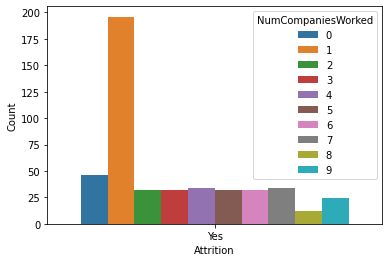

In [75]:
# Plotting a graph 
sns.barplot(x='Attrition', y='Count', data=Experience, hue='NumCompaniesWorked')

# Below graph is showing that the employees who have worked in 2 companies are having a highest attrition rate.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

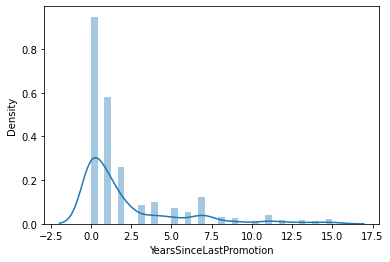

In [76]:
sns.distplot(data['YearsSinceLastPromotion'], hist=True)

   ## Data Preprocessing

In [77]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [78]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [79]:
# As the columns EmployeeCount, Over18 and StandardHours are constant variable. so, we cna drop these variables 
# and this will not affect our data.

data= data.drop(['EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

In [80]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [81]:
data.duplicated()
# data.dtypes

0       False
1       False
2       False
3       False
4       False
        ...  
2935     True
2936     True
2937     True
2938     True
2939     True
Length: 2940, dtype: bool

In [82]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [83]:
def preprocessor(df):
    res_df = data.copy()
    le = preprocessing.LabelEncoder()
  
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    
    return res_df

encoded_data = preprocessor(data)

In [84]:
encoded_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [85]:
# Ceperating Targate variable and independant variable
# x = encoded_data.iloc[:, encoded_data.columns != 'Attrition']
# y = encoded_data.iloc[:, encoded_data.columns == 'Attrition']


x = encoded_data.drop(['Attrition'],axis=1)
y = encoded_data['Attrition'].values

In [162]:
# Spliting training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [163]:
x_train.shape

(2352, 30)

In [164]:
# RandomForest Classifier
fit_rf = RandomForestClassifier()


In [165]:
#Finding the best parameter using gridsearchcv
# param_dist = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy']}

# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = 3)

# cv_rf.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)



In [166]:
# Finding the error rate for different estimaters value varying from 15-1000.

fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute

In [167]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

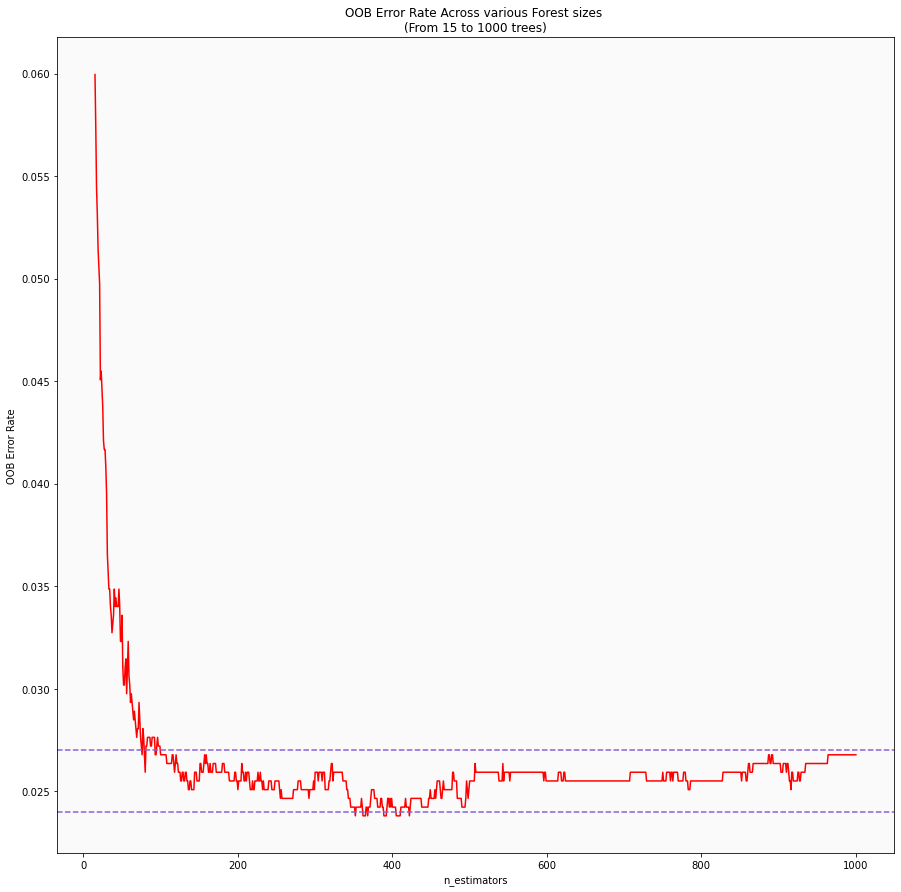

In [171]:
# Plotting the OOB graph to find the optimal no of estimaters.
fig, ax = plt.subplots(figsize=(15, 15))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.027, color='#875FDB',linestyle='--')
plt.axhline(0.024, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [111]:
# Setting best parameter for RF 
fit_rf.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=200)

In [112]:
# Training the model
fit_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [117]:

Training_score = fit_rf.score(x_train, y_train)
print ('Training Score', Training_score)

Testing_score = fit_rf.score(x_test, y_test)
print ('Tesiting Score', Testing_score)


Training Score 1.0
Tesiting Score 0.9727891156462585


In [118]:
y_prob = fit_rf.predict_proba(x_test)[:,1]

In [119]:
# Calculating the pedicted y_test value ob the basis of training of model
y_pred = fit_rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [123]:
# Creating confusion matrix
print (confusion_matrix(y_test, y_pred))

[[496   0]
 [ 16  76]]


In [120]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

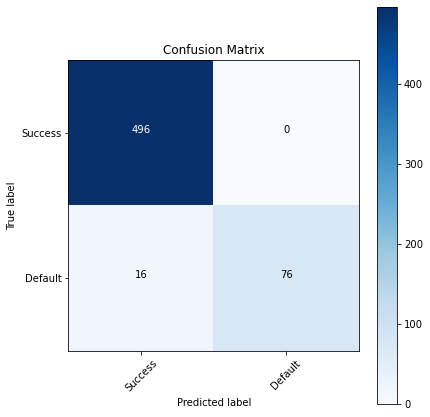

In [122]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

In [126]:
#Perforance metrics

In [138]:
print("Model Accuracy :", (fit_rf.score(x_test, y_test))*100)

print("Modekl Recall", (recall_score(y_test, y_pred))*100)

Model Accuracy : 97.27891156462584
Modekl Recall 82.6086956521739


In [139]:
# Plotting Variable importance

In [142]:
importances = fit_rf.feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(x.shape[1]):
    print(i+1, indices[i], importances[indices[i]])

1 15 0.08160652181258515
2 18 0.06010800810148718
3 0 0.060012128527205236
4 2 0.05662548876573621
5 16 0.05481686900443574
6 23 0.05231090361152507
7 4 0.048274954967186146
8 9 0.047131218766362754
9 26 0.0413349235439982
10 19 0.036100553887341166
11 17 0.03431561670905464
12 12 0.03225657255831431
13 7 0.030493403071905116
14 22 0.03032736428145312
15 29 0.029313084495367726
16 13 0.028392015413160658
17 10 0.02814502455865161
18 28 0.026098421784743295
19 24 0.025971029414627603
20 27 0.025615381858094848
21 25 0.025398815554753477
22 21 0.023284455607304654
23 14 0.021611438657000482
24 6 0.021003680074687215
25 11 0.02084315341106523
26 5 0.019771924924485443
27 1 0.014530662890428075
28 3 0.011763432466291362
29 8 0.008288201766721615
30 20 0.004254749514026692


<AxesSubplot:>

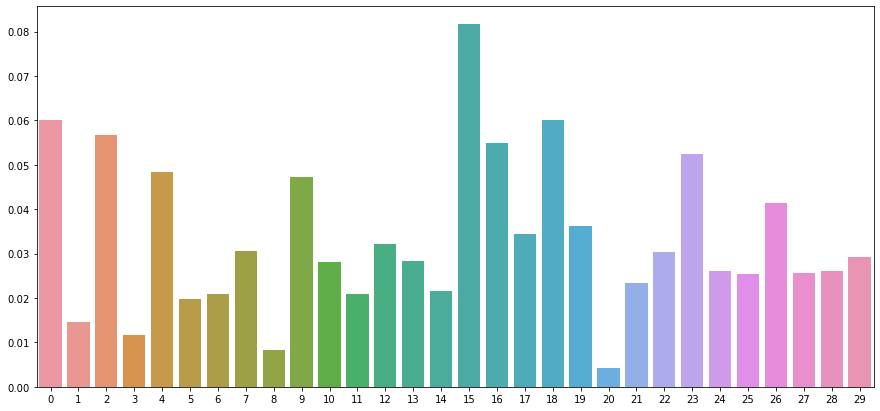

In [160]:
#Plotting a graph to see the importance of variable.
plt.figure(figsize=(15,7))
sns.barplot(x=indices, y=importances[indices])